In [1]:
# 1.
# Prepare the Data:Complete
# Run the provided package dependency and data imports, and then merge the mouse_metadata and study_results DataFrames into a single DataFrame.:Complete

# Display the number of unique mice IDs in the data:complete
#  check for any mouse ID with duplicate time points. Display the data associated with that mouse ID, and then create a new DataFrame where this data is removed. Use this cleaned DataFrame for the remaining steps.

# Display the updated number of unique mice IDs.:Complete

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [3]:
mouse_data = pd.read_csv(mouse_metadata_path)
study_data = pd.read_csv(study_results_path) 

In [10]:
merge_df = pd.merge(study_data, mouse_data)
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [29]:
mouseStudy_df = merge_df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]]

mouseStudy_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [30]:
mouseStudy_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [31]:
study_Mouse_df = mouseStudy_df.astype({"Tumor Volume (mm3)": 'int64'}, errors ='raise')
study_Mouse_df['Tumor Volume (mm3)'].dtype

dtype('int64')

In [32]:
mouse_count_df = study_Mouse_df["Mouse ID"].nunique()
mouse_count_df

249

In [33]:
duplicates = study_Mouse_df[study_Mouse_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45,0,Propriva,Female,21,26
137,g989,0,45,0,Propriva,Female,21,26
329,g989,5,48,0,Propriva,Female,21,26
360,g989,5,47,0,Propriva,Female,21,26
620,g989,10,51,0,Propriva,Female,21,26
681,g989,10,49,0,Propriva,Female,21,26
815,g989,15,51,1,Propriva,Female,21,26
869,g989,15,53,0,Propriva,Female,21,26
950,g989,20,55,1,Propriva,Female,21,26
1111,g989,20,54,1,Propriva,Female,21,26


In [37]:
Main_df = study_Mouse_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')

Main_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45,0,Capomulin,Female,9,22
1,f932,0,45,0,Ketapril,Male,15,29
2,g107,0,45,0,Ketapril,Female,2,29
3,a457,0,45,0,Ketapril,Female,11,30
4,c819,0,45,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41,2,Capomulin,Male,12,25
1889,u364,45,31,3,Capomulin,Male,18,17
1890,p438,45,61,1,Ceftamin,Female,11,26
1891,x773,45,58,4,Placebo,Female,21,30


In [50]:
Main_df.value_counts("Mouse ID")

Mouse ID
a203    10
l897    10
m546    10
m550    10
m601    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Name: count, Length: 249, dtype: int64

In [ ]:
# Generate Summary Statistics: Complete
# Create a DataFrame of summary statistics. Remember, there is more than one method to produce the results you're after, so the method you use is less important than the result.

# Your summary statistics should include: Complete

# A row for each drug regimen. These regimen names should be contained in the index column.

# A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

In [67]:

studyStats_df = Main_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume=('mean'),
    Median_Tumor_Volume=('median'),
    Tumor_Volume_Variance=('var'),
    Tumor_Volume_std_dev=('std'),
    Tumor_Volume_Std_Err=lambda x: st.sem(x, nan_policy='omit') 
   
).reset_index()

studyStats_df


,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_std_dev,Tumor_Volume_Std_Err
0,Capomulin,40.213043,41.0,25.513366,5.051076,0.333058
1,Ceftamin,52.157303,51.0,38.347997,6.192576,0.464153
2,Infubinol,52.466292,51.0,42.114677,6.489582,0.486415
3,Ketapril,54.803191,53.0,67.816674,8.235088,0.600606
4,Naftisol,53.924731,52.0,64.610520,8.038067,0.589380
5,Placebo,53.607735,52.0,60.473051,7.776442,0.578018
6,Propriva,51.961538,50.0,41.856576,6.469666,0.517988
7,Ramicane,39.780702,40.0,24.022181,4.901243,0.324593
8,Stelasyn,53.823204,52.0,58.468570,7.646474,0.568358
9,Zoniferol,52.785714,51.0,47.329519,6.879645,0.509953


In [ ]:
# Create Bar Charts and Pie Charts: Complete
# Generate two bar charts. Both charts should be identical and show the total total number of rows (Mouse ID/Timepoints) for each drug regimen throughout the study.

# Create the first bar chart with the Pandas DataFrame.plot() method.

# Create the second bar chart with Matplotlib's pyplot methods.


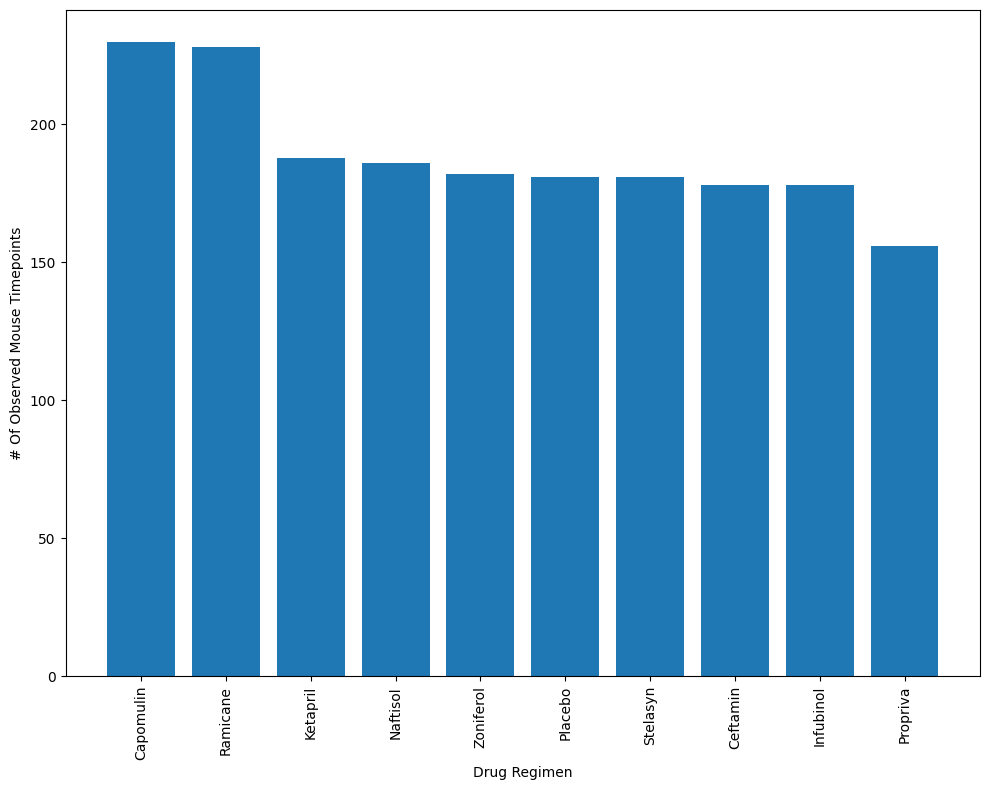

In [97]:

barChart1 = Main_df.groupby('Drug Regimen').size().reset_index(name='Total Count')

barChart1 = barChart1.sort_values(by='Total Count', ascending=False)

plt.figure(figsize=(10, 8))  

plt.bar(barChart1['Drug Regimen'], barChart1['Total Count'])

plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Timepoints')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


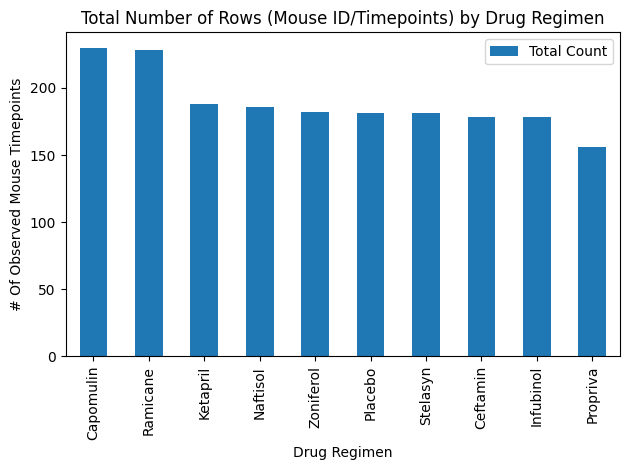

In [100]:

barchart2 = Main_df.groupby('Drug Regimen').size().reset_index(name='Total Count')

barchart2 = barchart2.sort_values(by='Total Count', ascending=False)

barchart2.plot(x='Drug Regimen', y='Total Count', kind='bar', 
                      title='Total Number of Rows (Mouse ID/Timepoints) by Drug Regimen')  
plt.ylabel('# Of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


In [ ]:
# Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.: Complete

# Create the first pie chart with the Pandas DataFrame.plot() method.

# Create the second pie chart with Matplotlib's pyplot methods.

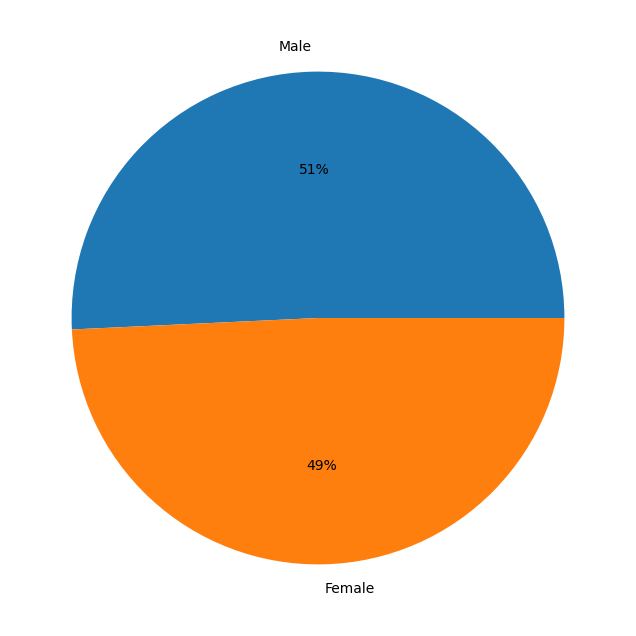

In [111]:

gender_pie1 = Main_df['Sex'].value_counts()

gender_percent = gender_pie1 / gender_pie1.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(gender_percent, labels=gender_percent.index, autopct='%1.0f%%', startangle=360, colors=['tab:blue','tab:orange'])
plt.show()


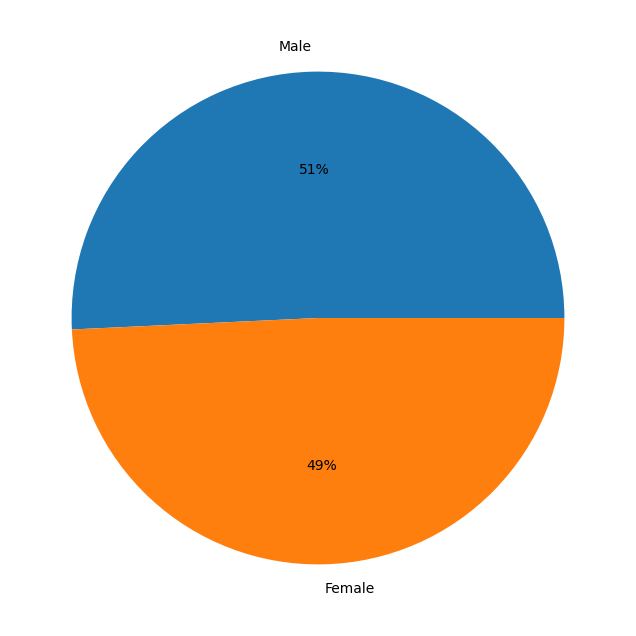

In [112]:
gender_pie2 = Main_df['Sex'].value_counts()

labels = gender_pie2.index
sizes = gender_pie2.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=360, colors=['tab:blue','tab:orange'])
plt.show()
